#### Dependencies
_____

In [1]:
import numpy as np
import pandas as pd
import dateinfer
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Datasource
_____

In [2]:
dataset = "../resources/household_power_consumption.csv"

master = pd.read_csv(dataset, 
                     sep=";", 
                     low_memory=False, 
                     header=0, 
                     infer_datetime_format=True, 
                     parse_dates={'datetime':[0,1]}, 
                     index_col=['datetime'])

#### Variable datatype conversation
_____

In [3]:
master.replace('?', np.NaN, inplace=True)
master = master.astype('float32')
master = master.asfreq('T')

master.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='datetime', length=2075259, freq='T')

#### Handle missing data
##### Fill missing values with a value at the same time one day ago
____

In [4]:
def fill_missing(values):
    total_nan_records = 0
    one_day = 60 * 24
    
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if np.isnan(values[row, col]):
                total_nan_records = total_nan_records + 1
                values[row, col]  = values[row - one_day, col]

    print (f'Total of NaN records.........: {total_nan_records}')
    print (f'Percentage of NaA records....: {total_nan_records/master.shape[0]}')
    print (f'Total records................: {master.shape[0]}')
    

fill_missing(master.values)

Total of NaN records.........: 181853
Percentage of NaA records....: 0.08762906220380204
Total records................: 2075259


#### Add remainder sub metering
###### (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) 
###### Represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
____

In [5]:
values = master.values
master['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

#### Final visualization ckeck
_______

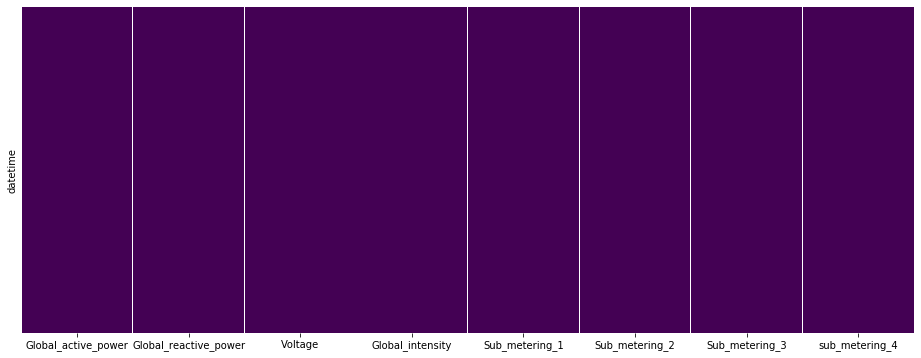

In [7]:
# checking for missing data

plt.figure(figsize=(16,6))

sns.heatmap(master.isnull(), yticklabels=False, cbar=False, cmap='viridis')

plt.show()

#### Save clean Dataframe to resources folder
____

In [61]:
master.to_csv('../resources/clean_household_power_consumption.csv')

In [13]:
master.loc['2006-12-16']['Global_active_power'].sum()

1209.176